**Implementación de un modelo Bayesiano para Analizar el Comportamiento Aleatorio de una Lotería**


# **Modelos y Simulación**
**Profesor:** PhD Juan Carlos Vélez


***Trabajo final de curso***

**Estudiante:** Deivis Martinez Acosta

Basado en el artículo : https://www.scielo.cl/scielo.php?script=sci_arttext&pid=S0718-07642018000100019

Importamos las librerias necesarias para el proyecto

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

Cargamos el archivo con los datos a procesar, con los números ganadores de una lotería israelí, que van desde el año 1968 hasta el año 2022.  Para un total de 4047 sorteos. inspeccionamos las cinco (5) primeras filas.
Los datos se cargan en una variable llamada X, para guardar congruencia con las variables descritas en el artículo.

In [4]:
X = pd.read_csv("IsraeliLottery.csv")
X.head()

,Game,Date,A,B,C,D,E,F
0,6801,03/09/1968,3,14,18,22,25,33
1,6802,10/09/1968,13,20,23,29,32,34
2,6803,17/09/1968,8,12,26,27,34,38
3,6804,24/09/1968,1,14,17,26,35,39
4,6805,01/10/1968,1,7,8,9,11,30


inspeccionamos las cinco (5) últimas filas cargadas con el fin de corroborar la calidad de los datos.

In [5]:
X.tail()

,Game,Date,A,B,C,D,E,F
4042,3467,14/05/2022,9,16,17,21,26,29
4043,3468,17/05/2022,1,4,5,24,31,32
4044,3469,19/05/2022,1,8,18,25,29,30
4045,3470,21/05/2022,3,4,5,15,24,33
4046,3471,24/05/2022,6,10,13,20,23,35


Revisamos las características de nuestros datos, ¿qué tipo son?, recordando que para las operaciones deben ser numéricos.

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4047 entries, 0 to 4046
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Game    4047 non-null   int64 
 1   Date    4047 non-null   object
 2   A       4047 non-null   int64 
 3   B       4047 non-null   int64 
 4   C       4047 non-null   int64 
 5   D       4047 non-null   int64 
 6   E       4047 non-null   int64 
 7   F       4047 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 253.1+ KB


Depurando nuestros datos eliminamos la columna de consecutivo de sorteos y la fecha en la que se hizo para quedar con la matriz de resultados.

In [7]:
X.drop(['Game', 'Date'], axis=1, inplace=True)

Verificamos que no estén las columnas que deseamos eliminar

In [8]:
X.head()

,A,B,C,D,E,F
0,3,14,18,22,25,33
1,13,20,23,29,32,34
2,8,12,26,27,34,38
3,1,14,17,26,35,39
4,1,7,8,9,11,30


Miramos la descripción de los datos, para verificar la completitud de ellos con la cantidad, tenemos el promedio, el valor mínimo, el valor máximo y la desviación estándar.

In [9]:
X.describe()

,A,B,C,D,E,F
count,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000
mean,5.698542,11.428713,17.128737,22.948357,28.795404,34.635285
std,4.635402,5.988067,6.698026,6.820599,6.616360,5.910514
min,1.000000,2.000000,3.000000,4.000000,7.000000,13.000000
25%,2.000000,7.000000,12.000000,18.000000,24.000000,31.000000
50%,4.000000,10.000000,17.000000,23.000000,29.000000,35.000000
75%,8.000000,15.000000,22.000000,28.000000,33.000000,38.000000
max,31.000000,37.000000,44.000000,46.000000,48.000000,49.000000


image.png

Una vez los datos están depurados se procede a implementar el modelo
\begin{gather}
  P_i(x) = X^tW_iX + w^t_iX + w_{io}
\end{gather}

Los valores de \begin{gather}
  P_i(x) = X^t\  y\  de\  X, son\ la\ transpuesta\ del\ resultado\ y\ el\ resultado\ de\ los\ sorteos,\  En\ sintesis\ nuestros\ datos.
\end{gather}

\begin{gather}
 W_i = - 1/2\sum_i^{-1},\ donde
\end{gather}

\
\begin{gather}
 \sum_i^{-1},\ es\ la\ invertida\ de\ la\ matriz\ de\ covarianza
\end{gather}

Primero encontramos la matriz de covarianza para nuestros datos que están en X y su invertida

In [10]:
headers = ["A", "B", "C", "D", "E", "F"]
Matriz_covarianza = np.cov(X, rowvar=False)
print(tabulate(Matriz_covarianza, headers, tablefmt="fancy_grid"))
Matriz_cov_invertida = np.linalg.inv(Matriz_covarianza)
print(tabulate(Matriz_cov_invertida, headers, tablefmt="fancy_grid"))

╒══════════╤═════════╤═════════╤═════════╤══════════╤══════════╕
│        A │       B │       C │       D │        E │        F │
╞══════════╪═════════╪═════════╪═════════╪══════════╪══════════╡
│ 21.487   │ 18.2934 │ 15.5588 │ 11.741  │  8.44696 │  5.82058 │
├──────────┼─────────┼─────────┼─────────┼──────────┼──────────┤
│ 18.2934  │ 35.8569 │ 29.8012 │ 22.9052 │ 16.6132  │ 11.108   │
├──────────┼─────────┼─────────┼─────────┼──────────┼──────────┤
│ 15.5588  │ 29.8012 │ 44.8636 │ 34.7669 │ 25.4465  │ 16.629   │
├──────────┼─────────┼─────────┼─────────┼──────────┼──────────┤
│ 11.741   │ 22.9052 │ 34.7669 │ 46.5206 │ 33.8206  │ 22.0125  │
├──────────┼─────────┼─────────┼─────────┼──────────┼──────────┤
│  8.44696 │ 16.6132 │ 25.4465 │ 33.8206 │ 43.7762  │ 29.0645  │
├──────────┼─────────┼─────────┼─────────┼──────────┼──────────┤
│  5.82058 │ 11.108  │ 16.629  │ 22.0125 │ 29.0645  │ 34.9342  │
╘══════════╧═════════╧═════════╧═════════╧══════════╧══════════╛
╒══════════════╤═════════

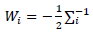

In [11]:
Wi = -1/2 * (Matriz_cov_invertida)
print(tabulate(Wi, headers, tablefmt="fancy_grid"))
Wi.shape

╒══════════════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╕
│            A │            B │            C │            D │            E │            F │
╞══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╡
│ -0.041176    │  0.0203881   │  0.00109972  │ -0.000342628 │ -0.00047647  │  0.000466616 │
├──────────────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│  0.0203881   │ -0.0412402   │  0.0203778   │  6.07897e-05 │ -0.000359228 │  0.00027663  │
├──────────────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│  0.00109972  │  0.0203778   │ -0.0405689   │  0.0197062   │  0.000577084 │ -0.000248829 │
├──────────────┼──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│ -0.000342628 │  6.07897e-05 │  0.0197062   │ -0.0390789   │  0.0192879   │ -0.000765569 │
├──────────────┼──────────────┼──────────────┼──────────────┼──────────────┼────

(6, 6)

Para encontrar\begin{gather}w_i\end{gather}
Primero debemos encontrar \begin{gather}  u_i,\ el\ vector\ de\ medias\ de\ nuestros\ datos
\end{gather}
image.png

Se calcula el vector de medias

In [12]:
ui = np.array([X.mean()])
print(tabulate(ui, headers, tablefmt="fancy_grid"))

╒═════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│       A │       B │       C │       D │       E │       F │
╞═════════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│ 5.69854 │ 11.4287 │ 17.1287 │ 22.9484 │ 28.7954 │ 34.6353 │
╘═════════╧═════════╧═════════╧═════════╧═════════╧═════════╛


Como ya tenemos la matriz de covarianza invertida.  Se realizó un método capaz de multiplicar un vector por una matriz

In [13]:
def multiplicarVxM(vector, matriz):
  resultado = []
  linea = []
  for i in range(6):
    valor = 0
    for j in range(6):
      valor = valor + matriz[j][i] * vector[0][j]
    linea.append(valor)
  resultado.append(np.array(linea))
  return (np.array(resultado))

Se calcula el valor para wi, multiplicando la matriz de covarianza invertida por el vector de medias

In [14]:
wi = multiplicarVxM(vector=ui,matriz=Matriz_cov_invertida)
print(tabulate(wi, headers, tablefmt="fancy_grid"))

╒════════════╤═══════════╤═════════════╤═══════════╤════════════╤══════════╕
│          A │         B │           C │         D │          E │        F │
╞════════════╪═══════════╪═════════════╪═══════════╪════════════╪══════════╡
│ -0.0235644 │ 0.0109244 │ -0.00897901 │ 0.0632464 │ -0.0455475 │ 0.994213 │
╘════════════╧═══════════╧═════════════╧═══════════╧════════════╧══════════╛


Pasamos a calcular la constante wio

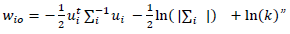

Construimos un método para multiplicar dos vectores

In [15]:
def multiplicar_vectores(ui, uit):
  acumulado = 0
  for i in range(6):
    producto = ui[0][i] * uit[i][0]
    acumulado = acumulado + producto
  return acumulado

Se procede a encontrar el valor de wio, multiplicando -1/2 por la multiplicación de la traspuesta del vector de medias por la matriz de covarianza invertida por el vector de medias, luego se le muma -1/2 por el logaritmo natural de la determinante de la matriz de covarianza, más el logaritmo natural de la constante k, para nuestro caso 6

In [16]:
wio = -1/2 * (multiplicar_vectores(multiplicarVxM(vector=ui,matriz=Matriz_cov_invertida), uit=ui.T)) - 1/2 * np.log(np.linalg.det(Matriz_covarianza)) + np.log(6)
wio

-24.29097030868664

Se crea un método para extraer los valores de cada fila de resultados, es decir por cada sorteo

In [17]:
def getXi(i):
  x = np.array(X.iloc[i])
  X1 = []
  X1.append(x)
  X1 = np.array(X1)
  return X1

image.png

Implementamos el modelo para cada una de las filas o sorteos en nuestros datos, donde X es el valor de la fila actual que procesamos, los valores son almacenados en cuatro listas con diferentes dígitos de precisión para ver su comportamiento gráficamente
\begin{gather}
  P_i(x) = X^tW_iX + w^t_iX + w_{io}
\end{gather}

In [18]:
resultados_4 = []
resultados_3 = []
resultados_2 = []
resultados_1 = []
for i in range(len(X)):
  Xi = getXi(i)
  Px = multiplicar_vectores(multiplicarVxM(Xi,Wi),Xi.T) + multiplicar_vectores(Xi,wi.T) + wio
  resultados_4.append(round(Px,4))
  resultados_3.append(round(Px,3))
  resultados_2.append(round(Px,2))
  resultados_1.append(round(Px,1))

De la siguiente forma se aprecia más detallada con el número de filas y columnas especificados para cada vector y/o matriz

\begin{gather}
  P_{resultados}(x) = X^t_{(1xk)}W_{i\_resultados(kxk)}X_{kx1} + w^t_{i\_resultados(1xk)}X_{(kx1)} + w_{io\_resultados}
\end{gather}

Verificamos, que los vectores y matrices tengan las dimensiones sugeridas en el modelo

In [19]:
print(f'Vector de medias: {ui.shape}')
print(f'Vector de medias traspuesto: {ui.T.shape}')
print(f'Matriz de Wi: {Wi.shape}')
print(f'Matriz wi traspuesta: {wi.T.shape}')

Vector de medias: (1, 6)
Vector de medias traspuesto: (6, 1)
Matriz de Wi: (6, 6)
Matriz wi traspuesta: (6, 1)


Creamos los vectores de frecuencias para graficar e identificar el valor P(x) con mayor frecuencia para el modelo, para ello lo hacemos con 4, 3, 2 y 1 dígito de precisión

In [20]:
elementos_4, frecuencias_4 = np.unique(np.array(resultados_4), return_counts=True)
elementos_3, frecuencias_3 = np.unique(np.array(resultados_3), return_counts=True)
elementos_2, frecuencias_2 = np.unique(np.array(resultados_2), return_counts=True)
elementos_1, frecuencias_1 = np.unique(np.array(resultados_1), return_counts=True)

In [21]:
valor_frecuencia = 0
elemento_frecuencia = ''
for elemento, frecuencia in zip(elementos_1, frecuencias_1):
  if frecuencia > valor_frecuencia :
    valor_frecuencia = frecuencia
    elemento_frecuencia = elemento
print("Elemento:", elemento_frecuencia, "Frecuencia:", valor_frecuencia)

Elemento: -8.7 Frecuencia: 138


El elemento con mayor frecuencia es -8.7 pero solo con un dígito de precisión, como se puede apreciar en la siguiente gráfica

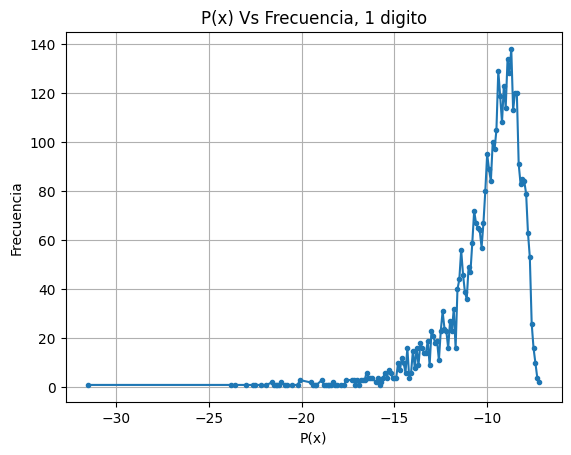

In [20]:
plt.plot(elementos_1,frecuencias_1,marker =".")
plt.xlabel('P(x)')
plt.ylabel('Frecuencia')
plt.title('P(x) Vs Frecuencia, 1 digito')
plt.grid()
plt.show()

Identificamos el rango de mayor frecuencia en nuestro caso son los mayores a 120 y encontramos los límites de estos elementos, obteniendo que los valores P(x) con mayor frecuencia se encuentran entre -9.4 y -8.7

In [21]:
valor_frecuencia = 0
elemento_frecuencia = ''
for elemento, frecuencia in zip(elementos_1, frecuencias_1):
  if frecuencia > valor_frecuencia :
    valor_frecuencia = frecuencia
    elemento_frecuencia = elemento
  if frecuencia > 120 :
    print("Elemento:", elemento_frecuencia, "Frecuencia:", valor_frecuencia)

Elemento: -9.4 Frecuencia: 129
Elemento: -9.4 Frecuencia: 129
Elemento: -8.9 Frecuencia: 134
Elemento: -8.9 Frecuencia: 134
Elemento: -8.7 Frecuencia: 138


Encontramos el elemento mayor y el elemento menor con 4 dígitos de precisión para calcular el promedio como nuestro elemento indicativo

In [22]:
elemento_menor_frecuencia = 10000
elemento_mayor_frecuencia = -10000
for elemento, frecuencia in zip(elementos_4, frecuencias_4):
  if elemento >= -9.4 and elemento <= -8.7 :
    if elemento > elemento_mayor_frecuencia :
      elemento_mayor_frecuencia = elemento
    if elemento < elemento_menor_frecuencia :
      elemento_menor_frecuencia = elemento
elemento_promedio = (elemento_mayor_frecuencia + elemento_menor_frecuencia)/2
print("Elemento mayor:", elemento_mayor_frecuencia)
print("Elemento menor:", elemento_menor_frecuencia)
print("Elemento promedio:", elemento_promedio)

Elemento mayor: -8.7004
Elemento menor: -9.3996
Elemento promedio: -9.05


Ahora graficamos con 2, 3 y 4 dígitos de precisión para analizar nuestros resultados

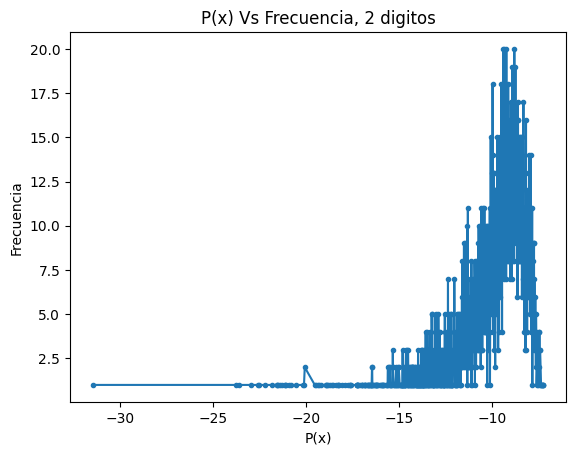

In [ ]:
plt.plot(elementos_2,frecuencias_2,marker =".")
plt.xlabel('P(x)')
plt.ylabel('Frecuencia')
plt.title('P(x) Vs Frecuencia, 2 digitos')
plt.show()

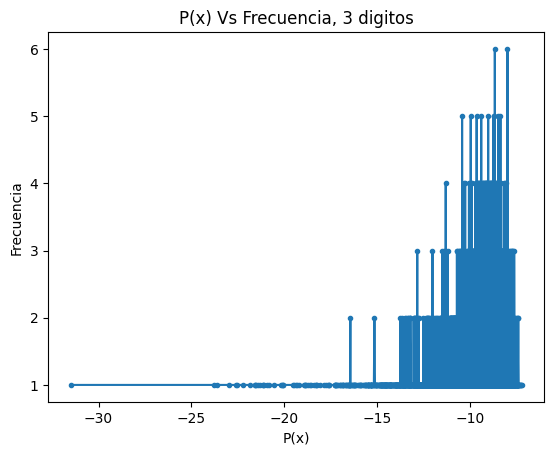

In [ ]:
plt.plot(elementos_3,frecuencias_3,marker =".")
plt.xlabel('P(x)')
plt.ylabel('Frecuencia')
plt.title('P(x) Vs Frecuencia, 3 digitos')
plt.show()

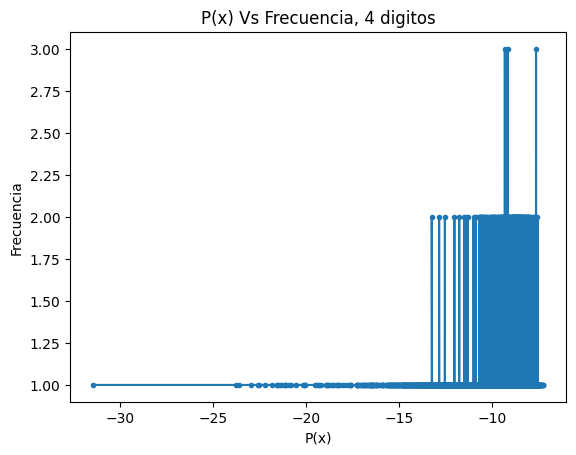

In [ ]:
plt.plot(elementos_4,frecuencias_4,marker =".")
plt.xlabel('P(x)')
plt.ylabel('Frecuencia')
plt.title('P(x) Vs Frecuencia, 4 digitos')
plt.show()

Cálculo del vector de máximos y mínimos presentes en la matriz de entenamiento

In [ ]:
minimo = np.amin(X)
maximo = np.amax(X)

Algoritmo que genera hasta 50000001 valores de sorteos para ser evaluados posteriormente con el modelo

In [25]:
fila = []
lista = []
for balota1 in range(minimo['A'], maximo['A']+1):
  if len(lista) > 50000000:
        break
  for balota2 in range(minimo['B'], maximo['B']+1):
    if len(lista) > 50000000:
        break
    for balota3 in range(minimo['C'], maximo['C']+1):
      if len(lista) > 50000000:
        break
      for balota4 in range(minimo['D'], maximo['D']+1):
        if len(lista) > 50000000:
          break
        for balota5 in range(minimo['E'], maximo['E']+1):
          if len(lista) > 50000000:
            break
          for balota6 in range(minimo['F'], maximo['F']+1):
            if len(lista) > 50000000:
              break
            fila.append(balota1)
            fila.append(balota2)
            fila.append(balota3)
            fila.append(balota4)
            fila.append(balota5)
            fila.append(balota6)
            lista.append(np.array(fila))
            fila = []

In [26]:
len(lista)

50000001

En la construcción de los datos de validación, se elaboró un algoritmo que permite generar un valor Xi aleatorio cuyos valores de cada columna están entre el mínimo y el máximo de los valores de entrenamiento, también se descartan las secuencias repetidas por lo poco probable que estas salgan.  El valor del error para la precisión puede ser adaptado según la necesidad.  Por tiempo de procesamiento el error permitido es 0.01, con mayor capacidad de procesamiento se puede tener un menor error permitido

In [ ]:
import random
xnew = []
row = []
contador = 0
resultados = []
procesados = []
while True:
  contador = contador + 1
  row.append(random.randrange(minimo['A'], maximo['A'],1))
  row.append(random.randrange(minimo['B'], maximo['B'],1))
  row.append(random.randrange(minimo['C'], maximo['C'],1))
  row.append(random.randrange(minimo['D'], maximo['D'],1))
  row.append(random.randrange(minimo['E'], maximo['E'],1))
  row.append(random.randrange(minimo['F'], maximo['F'],1))
  xnew.append(row)
  if row not in procesados:
    procesados.append(row)
    X_i = np.array(xnew)
    Px = multiplicar_vectores(multiplicarVxM(X_i,Wi),X_i.T) + multiplicar_vectores(X_i,wi.T) + wio
    error_permitido = 0.01
    Px_round = Px
    error_actual = np.abs(Px_round - elemento_promedio)
    if error_permitido >= error_actual:
      resultado = {}
      resultado['index'] = contador
      resultado['X'] = X_i
      resultado['Px'] = Px
      print(resultado)
      resultados.append(resultado)
    if len(resultados)>3:
      break
  row = []
  xnew = []
  #if contador % 10000 == 0:
    #print(f'Vamos por: {contador}')
print(resultados)

{'index': 15454, 'X': array([[ 6, 17, 26, 30, 34, 43]]), 'Px': -9.04983576242006}
{'index': 90828, 'X': array([[ 3, 16, 23, 32, 36, 39]]), 'Px': -9.050828621513695}
{'index': 214120, 'X': array([[ 6, 13, 16, 27, 35, 44]]), 'Px': -9.056288201622184}
{'index': 256381, 'X': array([[ 9, 15, 26, 29, 34, 33]]), 'Px': -9.054465355942845}
[{'index': 15454, 'X': array([[ 6, 17, 26, 30, 34, 43]]), 'Px': -9.04983576242006}, {'index': 90828, 'X': array([[ 3, 16, 23, 32, 36, 39]]), 'Px': -9.050828621513695}, {'index': 214120, 'X': array([[ 6, 13, 16, 27, 35, 44]]), 'Px': -9.056288201622184}, {'index': 256381, 'X': array([[ 9, 15, 26, 29, 34, 33]]), 'Px': -9.054465355942845}]


Este es el segundo algoritmo que recorre 50000001 convinaciones de números por tiempo de procesamiento se toma un margen de error de 0.00001

In [29]:
contador = 0
resultados = []
procesados1 = []
X_fila = []
for fila in lista:
  X_fila.append(fila)
  X_i = np.array(X_fila)
  X_fila = []
  contador = contador + 1
  Px = multiplicar_vectores(multiplicarVxM(X_i,Wi),X_i.T) + multiplicar_vectores(X_i,wi.T) + wio
  error_permitido = 0.00001
  Px_round = Px
  error_actual = np.abs(Px_round - elemento_promedio)
  if error_permitido >= error_actual:
    resultado = {}
    resultado['index'] = contador
    resultado['X'] = X_i
    resultado['Px'] = Px
    print(resultado)
    resultados.append(resultado)
  if len(resultados)>3:
    break
  row = []
  xnew = []
  #if contador % 10000 == 0:
    #print(f'Vamos por: {contador}')
print(resultados)

{'index': 6303667, 'X': array([[ 1,  4, 13, 18, 24, 26]]), 'Px': -9.050002825246832}
{'index': 11989725, 'X': array([[ 1,  6, 14, 22, 23, 35]]), 'Px': -9.050009432593232}
{'index': 20067599, 'X': array([[ 1,  9,  9, 17, 28, 32]]), 'Px': -9.049999055255498}
{'index': 32034953, 'X': array([[ 1, 13, 20, 21, 28, 32]]), 'Px': -9.050001256040236}
[{'index': 6303667, 'X': array([[ 1,  4, 13, 18, 24, 26]]), 'Px': -9.050002825246832}, {'index': 11989725, 'X': array([[ 1,  6, 14, 22, 23, 35]]), 'Px': -9.050009432593232}, {'index': 20067599, 'X': array([[ 1,  9,  9, 17, 28, 32]]), 'Px': -9.049999055255498}, {'index': 32034953, 'X': array([[ 1, 13, 20, 21, 28, 32]]), 'Px': -9.050001256040236}]
